# Support Vector Machine Classifier (SVM) Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

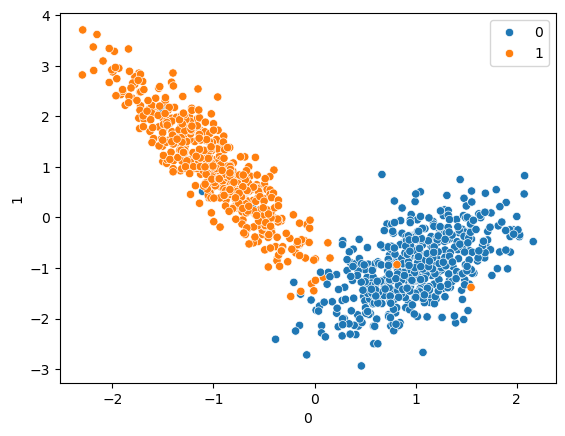

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [7]:
svc = SVC(kernel='linear')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [8]:
# Predictions 

y_pred = svc.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred), "\n")
print("Classification Report:", classification_report(y_test,y_pred))

Confusion Matrix:  [[121   1]
 [  2 126]] 

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       122
           1       0.99      0.98      0.99       128

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [10]:
# RBF

rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)

SVC()

In [11]:
y_pred_rbf = rbf.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_rbf), "\n")
print("Classification Report:", classification_report(y_test,y_pred_rbf))

Confusion Matrix:  [[122   0]
 [  2 126]] 

Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.98      0.99       128

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [12]:
#polynomial

poly = SVC(kernel='poly')
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [13]:
y_pred_poly = poly.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_poly), "\n")
print("Classification Report:", classification_report(y_test,y_pred_poly))

Confusion Matrix:  [[115   7]
 [  2 126]] 

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96       122
           1       0.95      0.98      0.97       128

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [14]:
# sigmoid
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [15]:
y_pred_sigmoid = sigmoid.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_sigmoid), "\n")
print("Classification Report:", classification_report(y_test,y_pred_sigmoid))

Confusion Matrix:  [[116   6]
 [  9 119]] 

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       122
           1       0.95      0.93      0.94       128

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [16]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#defining parameter range
param_grid = {'C': [0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.0001],'kernel':['rbf','poly']}

In [17]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose= 3)

In [18]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.973 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [20]:
y_pred_grid = grid.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_grid), "\n")
print("Classification Report:", classification_report(y_test,y_pred_grid))

Confusion Matrix:  [[122   0]
 [  2 126]] 

Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.98      0.99       128

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



# SVM Kernels Indepth Intution

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 -x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x]) 

In [28]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 -x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1]) 

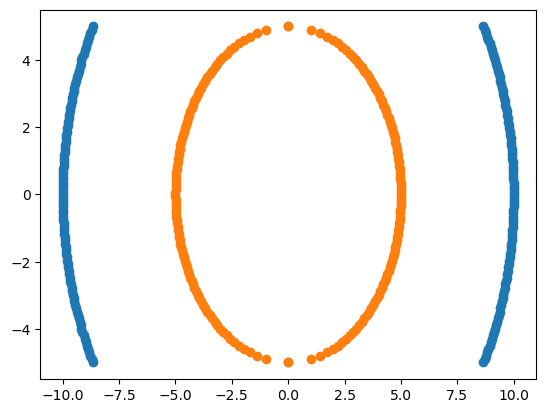

In [30]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [37]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['X1','X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
